In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
pd.set_option('display.max_columns', None)

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
US_full_dataset=pd.read_csv('Outputs/US_fulldataset.csv')

In [3]:
US_full_dataset.columns

Index(['GEO_ID', 'Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White', 'Black',
       'Rural', 'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'FIPS', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value',
       'county_name', 'state', 'DEMOCRAT_2012', 'REPUBLICAN_2012',
       'DEMOCRAT_2016', 'REPUBLICAN_2016'],
      dtype='object')

### Dummies

In [4]:
US_full_dataset['vote_gains']=US_full_dataset['REPUBLICAN_2016']-US_full_dataset['REPUBLICAN_2012']
US_full_dataset['seat_gains']=np.where((US_full_dataset['DEMOCRAT_2012']>US_full_dataset['REPUBLICAN_2012'])&(US_full_dataset['DEMOCRAT_2016']<US_full_dataset['REPUBLICAN_2012']),100,0)

In [5]:
bmx1=US_full_dataset[['Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'lessthan50K', '50to75k', '75to100k', 'morethan100k',
       'manu_arg', 'Poverty', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']]

## Vote shares

### Republican 2012

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


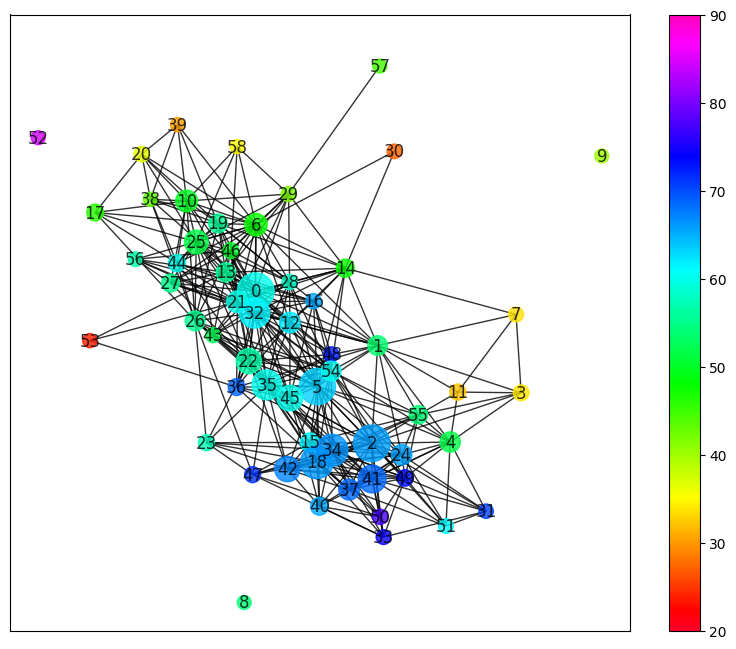

In [6]:
cdf = pd.DataFrame(US_full_dataset['REPUBLICAN_2012'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2012',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5),MIN_VALUE=20,MAX_VALUE=90)
plt.savefig('TDABM/US_mainresult_rep_2012.png')

### Democrat 2012

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


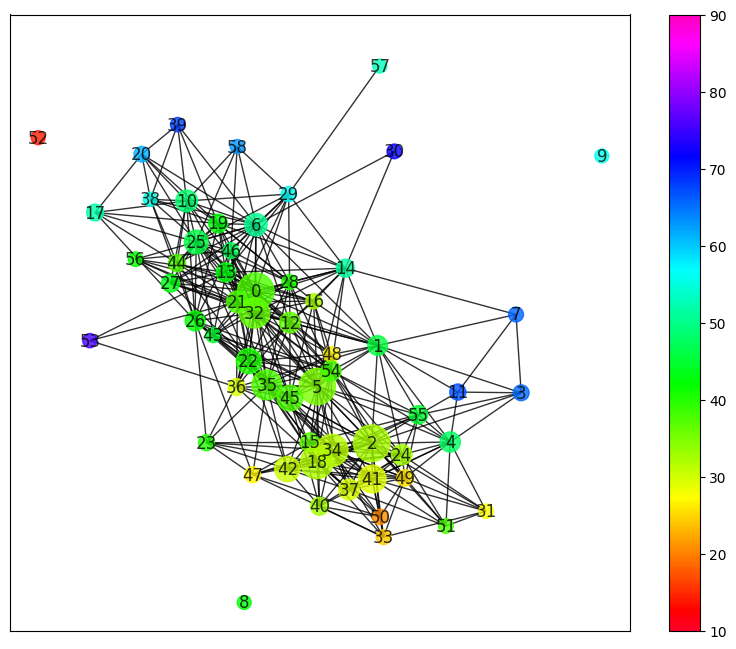

In [7]:
cdf = pd.DataFrame(US_full_dataset['DEMOCRAT_2012'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='DEMOCRAT_2012',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5),MIN_VALUE=10,MAX_VALUE=90)
plt.savefig('TDABM/US_mainresult_dem_2012.png')

### Republican 2016

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


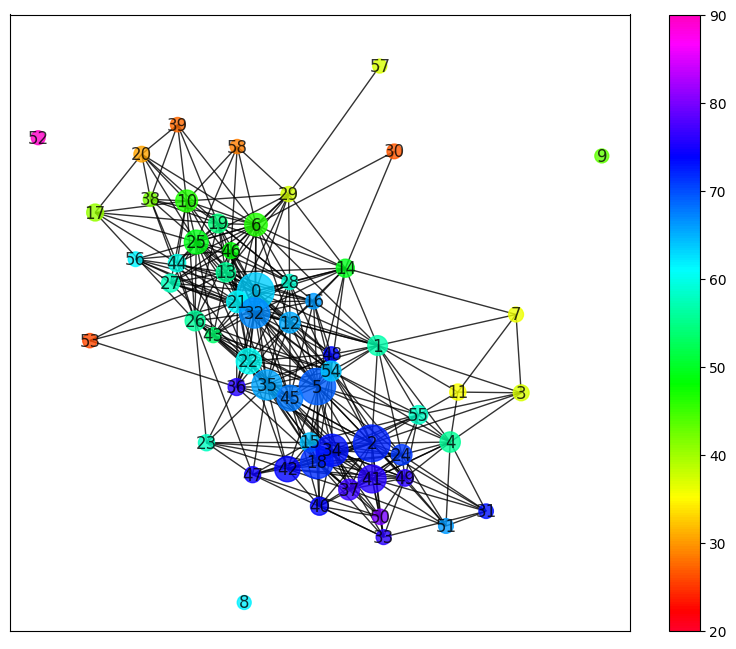

In [8]:
cdf = pd.DataFrame(US_full_dataset['REPUBLICAN_2016'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5),MIN_VALUE=20,MAX_VALUE=90)
plt.savefig('TDABM/US_mainresult_rep_2016.png')

### Democrat 2016

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


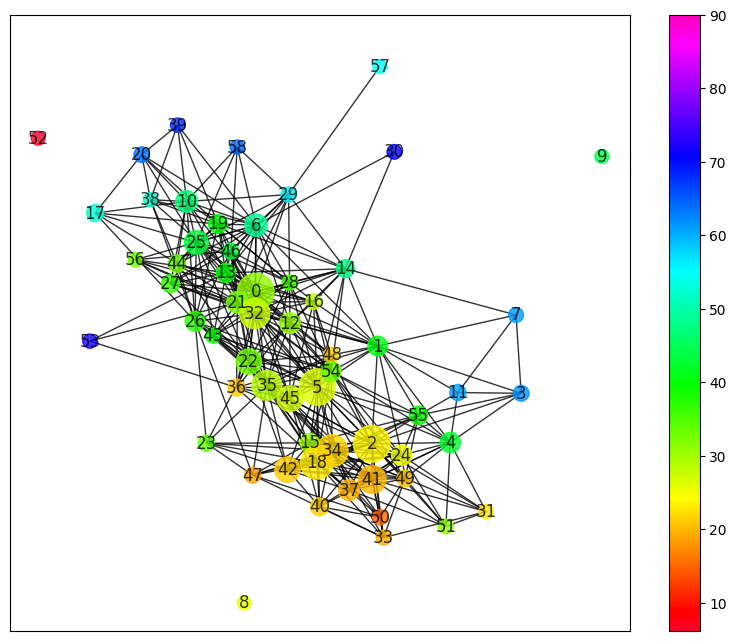

In [9]:
cdf = pd.DataFrame(US_full_dataset['DEMOCRAT_2016'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='DEMOCRAT_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5),MIN_VALUE=10,MAX_VALUE=90)
plt.savefig('TDABM/US_mainresult_dem_2016.png')

## Gains

### Vote share gains

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


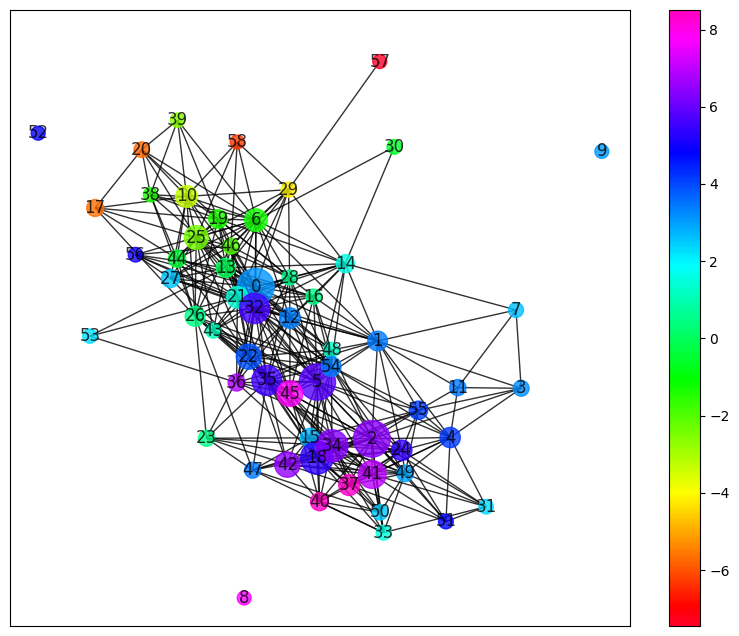

In [10]:
cdf = pd.DataFrame(US_full_dataset['vote_gains'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='vote_gains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('TDABM/US_votegains_2016.png')

### Switch gains

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


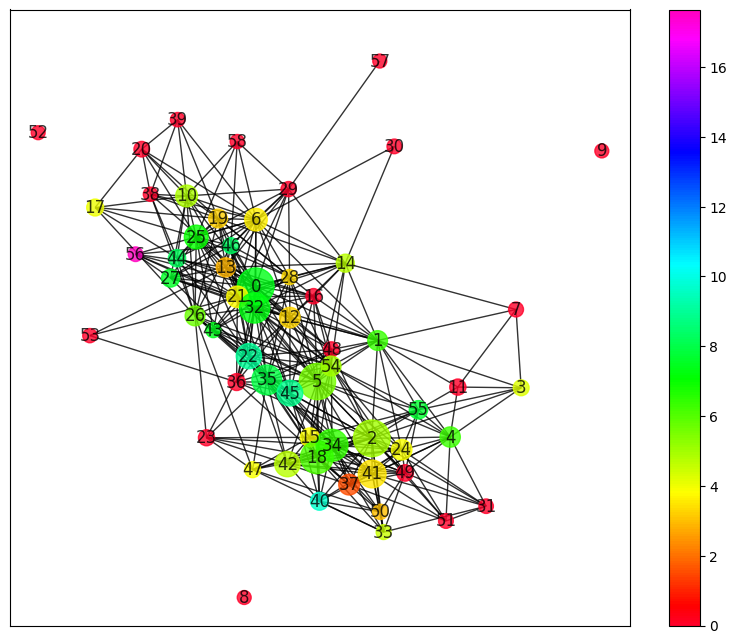

In [11]:
cdf = pd.DataFrame(US_full_dataset['seat_gains'])
eps=35
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='seat_gains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('TDABM/US_seatgains_2016.png')

## Analysing the balls

In [12]:
pb1 = bm1.points_and_balls()

In [13]:
pb1

,point,ball
0,0,0
1,1,0
2,7,0
3,15,0
4,16,0
...,...,...
10742,329,58
10743,577,58
10744,2890,58
10745,2899,58


In [14]:
US_results=US_full_dataset.copy()

In [15]:
US_results['point'] =US_results.index

In [16]:
US_results=US_results.merge(pb1, on='point')

In [17]:
## For making comparisons between the ball and average values for the variables
US_full_dataset.describe()

,GEO_ID,Nohighschool_25plus,Highschool_25plus,Somedegree_25plus,Assocdegree_25plus,Degree_25plus,Under18,18to24,25to34,35to49,50to64,Over65,White,Black,Rural,manu_arg,Poverty,lessthan50K,50to75k,75to100k,morethan100k,FIPS,Adult obesity raw value,Poor or fair health raw value,Unemployment raw value,DEMOCRAT_2012,REPUBLICAN_2012,DEMOCRAT_2016,REPUBLICAN_2016,vote_gains,seat_gains
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,30619.148362,14.224277,34.587091,21.880861,8.525498,20.783847,22.558703,9.009955,11.634586,18.002216,21.168433,17.624213,83.528227,9.968080,63.754916,19.218915,16.418979,52.949615,18.539788,11.672319,16.839274,30619.148362,30.947559,16.923892,6.228573,38.442635,59.577081,31.542312,63.258987,3.681905,5.362877
std,15003.599250,6.542912,7.070799,3.792383,2.555754,9.139611,3.422010,3.573370,2.247991,2.122785,2.797690,4.452441,16.406427,14.480919,33.772956,8.295985,6.505763,10.404013,2.787136,2.709991,7.932256,15003.599250,4.468338,4.959968,2.233174,14.717873,14.846438,15.226830,15.672719,5.675836,22.531984
min,1001.000000,1.300000,6.500000,8.300000,0.600000,3.000000,3.900000,0.700000,0.000000,4.900000,5.200000,3.900000,10.100000,0.200000,0.000000,0.200000,1.800000,14.800000,6.600000,1.300000,2.500000,1001.000000,10.700000,7.200000,1.188560,3.448276,7.193430,3.144654,4.087474,-37.618717,0.000000
25%,19033.500000,9.300000,30.200000,19.325000,6.800000,14.400000,20.500000,7.300000,10.300000,16.700000,19.600000,14.800000,75.800000,1.200000,35.146463,13.000000,11.800000,46.500000,16.800000,9.900000,11.600000,19033.500000,28.500000,13.000000,4.660904,27.809430,50.280136,20.372851,54.462820,0.659628,0.000000
50%,29204.000000,12.800000,34.900000,21.800000,8.300000,18.500000,22.500000,8.200000,11.400000,18.100000,21.200000,17.300000,89.700000,3.300000,66.050346,18.700000,15.700000,53.400000,18.600000,11.900000,15.000000,29204.000000,31.200000,15.900000,6.018293,37.156759,60.740595,28.323393,66.326097,3.667667,0.000000
75%,45775.000000,18.300000,39.600000,24.300000,10.100000,24.700000,24.300000,9.500000,12.700000,19.200000,22.700000,19.900000,96.100000,12.000000,100.000000,24.700000,19.900000,60.300000,20.300000,13.500000,19.800000,45775.000000,33.700000,20.000000,7.489068,47.451449,70.271498,39.907208,74.900062,7.234279,0.000000
max,56045.000000,51.500000,54.600000,36.300000,19.500000,80.200000,40.300000,55.700000,26.900000,29.400000,44.800000,53.100000,99.500000,88.600000,100.000000,69.600000,48.700000,83.000000,30.200000,32.400000,63.000000,56045.000000,46.600000,41.700000,23.617721,90.913114,95.862069,90.863822,94.584838,23.116316,100.000000


In [42]:
##For inspecting the characteristics of each ball

states = ['MICHIGAN', 'PENNSYLVANIA', 'WISCONSIN','OHIO']
US_results[(US_results['ball']==40)&(US_results['state']=='WISCONSIN')]

,GEO_ID,Nohighschool_25plus,Highschool_25plus,Somedegree_25plus,Assocdegree_25plus,Degree_25plus,Under18,18to24,25to34,35to49,50to64,Over65,White,Black,Rural,manu_arg,Poverty,lessthan50K,50to75k,75to100k,morethan100k,FIPS,Adult obesity raw value,Poor or fair health raw value,Unemployment raw value,county_name,state,DEMOCRAT_2012,REPUBLICAN_2012,DEMOCRAT_2016,REPUBLICAN_2016,vote_gains,seat_gains,point,ball
10428,55011,8.5,42.0,20.4,10.9,18.2,21.1,7.1,10.4,17.6,23.9,19.9,97.9,0.8,100.00000,31.2,10.8,47.2,23.0,12.7,17.1,55011,32.8,12.4,5.689813,BUFFALO,WISCONSIN,50.717431,47.790879,36.219233,57.942187,10.151307,100,3024,40
10444,55019,18.4,42.5,19.0,8.6,11.5,29.4,7.6,10.2,16.8,19.9,16.0,95.3,0.8,100.00000,38.4,14.9,53.2,21.4,13.1,12.3,55019,33.7,14.2,5.546397,CLARK,WISCONSIN,44.721397,53.706253,31.090026,63.592233,9.885980,0,3028,40
10555,55077,11.5,42.8,22.8,9.1,13.8,19.7,5.8,9.0,16.9,26.3,22.4,97.7,0.9,100.00000,29.1,11.7,51.6,22.0,13.2,13.1,55077,33.3,12.7,7.160921,MARQUETTE,WISCONSIN,49.524985,49.253547,35.588496,59.723806,10.470259,100,3057,40
10571,55083,9.6,44.0,19.5,10.8,16.2,20.7,6.7,9.7,19.5,25.1,18.5,97.3,0.6,100.00000,28.2,9.0,46.4,20.0,14.3,19.3,55083,28.6,11.8,6.247561,OCONTO,WISCONSIN,44.639710,54.086308,29.452398,66.337972,12.251663,0,3061,40
10595,55099,9.7,41.1,22.5,10.5,16.2,16.8,5.8,8.0,17.1,28.4,23.9,97.3,0.5,100.00000,37.8,12.8,57.0,20.3,11.2,11.6,55099,32.2,13.2,5.415747,PRICE,WISCONSIN,49.196304,49.158334,35.225023,60.208526,11.050191,100,3069,40
10610,55107,12.5,42.8,19.2,10.7,14.8,21.2,6.8,8.3,16.5,24.8,22.3,97.9,0.7,100.00000,32.9,15.9,61.1,19.8,9.1,10.1,55107,31.6,15.0,7.071161,RUSK,WISCONSIN,47.239605,51.119455,30.633554,64.399605,13.280150,0,3073,40
10635,55121,10.6,39.3,19.8,11.1,19.3,24.3,7.3,11.3,18.9,21.1,17.0,90.0,0.8,100.00000,36.7,9.7,47.8,20.7,14.5,17.1,55121,31.4,11.8,4.711051,TREMPEALEAU,WISCONSIN,56.412729,42.333655,41.213894,53.850091,11.516437,100,3080,40
10669,55137,13.8,41.8,21.8,7.6,15.1,18.8,6.4,10.1,17.1,25.3,22.4,94.4,2.0,99.71448,27.8,11.5,53.5,20.7,11.7,14.1,55137,32.0,13.5,7.160494,WAUSHARA,WISCONSIN,44.281208,54.465471,31.602634,63.913659,9.448188,0,3088,40


In [19]:
US_results.groupby('ball')['seat_gains'].mean().sort_values()

ball
29     0.000000
53     0.000000
52     0.000000
51     0.000000
49     0.000000
48     0.000000
39     0.000000
38     0.000000
36     0.000000
31     0.000000
30     0.000000
57     0.000000
23     0.000000
20     0.000000
16     0.000000
58     0.000000
8      0.000000
9      0.000000
7      0.000000
11     0.000000
37     1.578947
13     2.877698
50     3.030303
19     3.200000
12     3.260870
28     3.333333
41     3.448276
6      3.585657
21     3.755869
15     3.816794
24     3.888889
47     3.921569
17     4.000000
3      4.255319
33     4.545455
14     4.716981
42     4.748603
10     4.867257
2      4.989154
54     5.031447
5      5.549390
26     5.660377
18     6.125356
4      6.321839
1      6.410256
34     6.475904
25     7.023411
32     7.279029
0      7.343413
43     7.407407
27     7.547170
55     7.692308
35     7.899461
44     8.235294
46     8.333333
45     8.870968
22     9.014085
40     9.708738
56    17.647059
Name: seat_gains, dtype: float64

In [20]:
states = ['MICHIGAN', 'PENNSYLVANIA', 'WISCONSIN','OHIO']

# Calculate the total occurrences of each unique value in the 'ball' column
total_ball_counts = US_results['ball'].value_counts()

# Filter the DataFrame to include only rows from the specified states
filtered_data = US_results[US_results['state'].isin(states)]

# Calculate the occurrences of each unique value in the 'ball' column for the filtered data
filtered_ball_counts = filtered_data['ball'].value_counts()

# Compute the proportion of each ball that belongs to the specified states
ball_proportions = filtered_ball_counts / total_ball_counts

# Convert the proportions to a DataFrame for better display
ball_proportions_df = ball_proportions.to_frame(name='Proportion')

# Fill NaN values with 0 to indicate that the ball did not appear in the filtered data
ball_proportions_df.fillna(0, inplace=True)

# Display the result
print(ball_proportions_df.sort_values(by='Proportion'))

      Proportion
ball            
58      0.000000
38      0.000000
39      0.000000
31      0.000000
57      0.000000
48      0.000000
50      0.000000
20      0.000000
51      0.000000
16      0.000000
14      0.000000
52      0.000000
1       0.000000
53      0.000000
3       0.000000
9       0.000000
4       0.000000
8       0.000000
55      0.000000
7       0.000000
12      0.010870
24      0.011111
54      0.012579
49      0.015625
11      0.018182
47      0.019608
36      0.026667
19      0.032000
21      0.032864
28      0.033333
13      0.043165
15      0.045802
37      0.047368
30      0.055556
56      0.058824
41      0.066810
29      0.068966
23      0.075472
6       0.075697
2       0.075922
18      0.084046
10      0.088496
33      0.090909
46      0.104167
42      0.106145
17      0.106667
34      0.108434
22      0.121127
27      0.122642
25      0.127090
44      0.129412
26      0.132075
0       0.134989
5       0.136515
43      0.148148
40      0.165049
32      0.1767

In [21]:
US_results.to_csv('Outputs/US_ball_results.csv',index=False)